# Importing Necessary Libraries

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(101)

# Linear Regression

## Generating a Synthetic Dataset

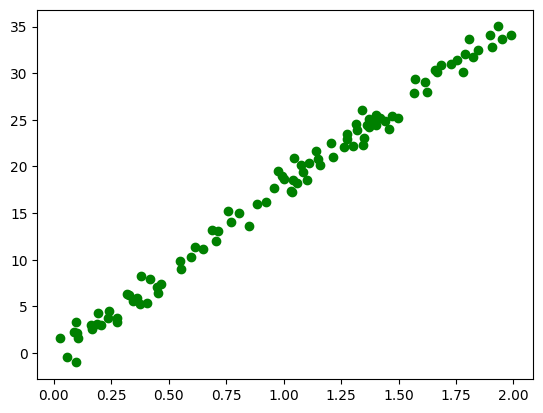

In [49]:
m=100
X=2*np.random.rand(m,1)
y=3.56*+5*X+np.random.randn(m,1)
plt.scatter(X,y,color='green')

## Finding the best thetha using the normal equation

In [50]:
X_b=add_dummy_feature(X)
thetha_best=np.linalg.inv(X_b.T@X_b)@X_b.T@y
print(thetha_best)

[[-0.14327123]
 [17.88824954]]


## The numpy alternative of add_dummy_features

In [51]:
X_b=np.c_[np.ones((X.shape[0],1)),X]
thetha_best=np.linalg.inv(X_b.T@X_b)@X_b.T@y
thetha_best 

array([[-0.14327123],
       [17.88824954]])

## Making Predictions

In [52]:
y_new=X_b@thetha_best
X1=np.array([[0],[2]])
X1_new=add_dummy_feature(np.array([[0],[2]]))
y1=X1_new@thetha_best
y1


array([[-0.14327123],
       [35.63322786]])

## Plotting the Regression

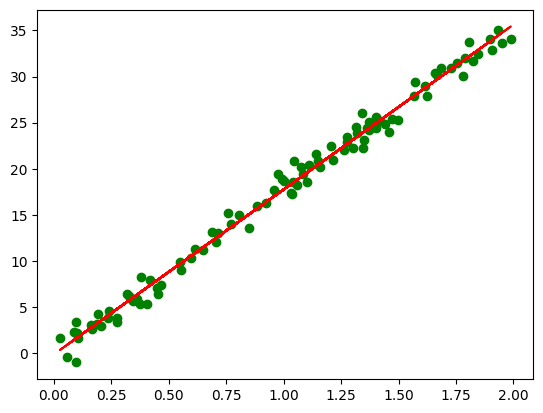

In [53]:
plt.scatter(X,y,color='green')
plt.plot(X,y_new,color='red')

## Performing Linear Regression using Scikit-Learn

array([[-0.14327123],
       [35.63322786]])

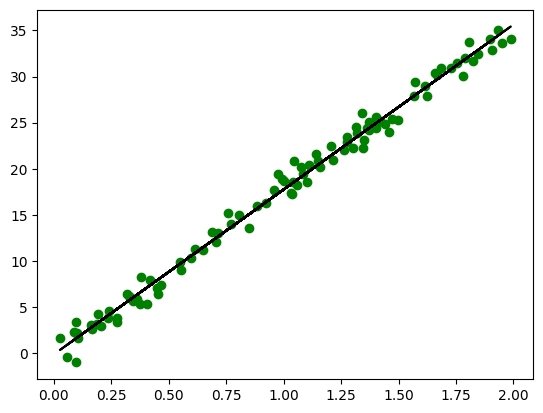

In [54]:
regression=LinearRegression()
regression.fit(X,y)
regression.intercept_ 
regression.coef_
ynew=regression.coef_*X + regression.intercept_
plt.scatter(X,y,color='green')
plt.plot(X,ynew,color='black')
regression.predict(X1)

## Using pseudoinverse that is calculated using SVD(Singular Value Decomposition)

In [55]:
np.linalg.pinv(X_b)@y

array([[-0.14327123],
       [17.88824954]])

In [56]:
print("Time Complexity of Normal Equation is O(n^2.4) or O(n^3)")
print("Time Complexity of SVD is O(n^2)")

Time Complexity of Normal Equation is O(n^2.4) or O(n^3)
Time Complexity of SVD is O(n^2)


## Using BatchGradient Descent


In [57]:
eta=0.1
n_epochs=1000
m=len(X_b)
thetha=np.random.randn(2,1)
for epoch in range(n_epochs):
    gradients=2/m*X_b.T@(X_b@thetha-y)
    thetha=thetha-eta*gradients
    


In [58]:
thetha

array([[-0.14327123],
       [17.88824954]])

## Using Stochastic Gradient descent

In [59]:
n_epochs = 100
t0, t1 = 5, 50  # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1)  # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [60]:
theta

array([[-0.1348704 ],
       [17.92856041]])

## Stochastic Gradient Descent using Scikit-Learn

In [61]:
sgd=SGDRegressor(max_iter=1000,tol=1e-5,penalty=None,eta0=0.01,n_iter_no_change=100,random_state=101)
sgd.fit(X,y.ravel())
sgd.intercept_
sgd.coef_

array([17.88406128])

# Polynomial Regression

## Generating a Synthetic Dataset

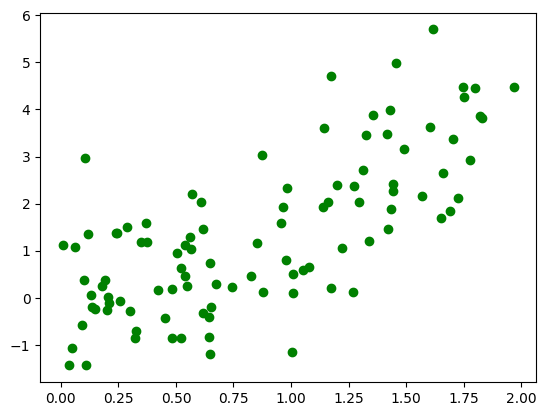

In [68]:
m=100
X=2*np.random.rand(m,1)
y=0.2*+0.3*X+1.2*(X**2)+np.random.randn(m,1)
plt.scatter(X,y,color='green')

## Creating the Polynomial Features

In [69]:
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X_poly[0]

array([1.60274052, 2.56877716])

## Feeding this data to our linear regression model

In [70]:
linear_regression=LinearRegression()
linear_regression.fit(X_poly,y)
print(linear_regression.intercept_)
print(linear_regression.coef_)
linear_regression.coef_.shape

[0.16255671]
[[-0.02219928  1.1619041 ]]


(1, 2)

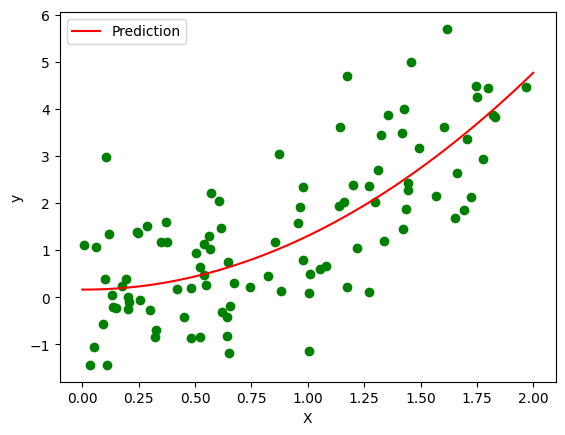

In [75]:
plt.scatter(X,y,color='green')
X_new = np.linspace(0, 2, 100).reshape(100, 1)

# We must transform these new points using the same polynomial features
X_new_poly = poly_features.transform(X_new)

# Use the model to predict the y-values for our new, sorted x-values
y_new = linear_regression.predict(X_new_poly)

# Plot the regression line, which will now be a smooth curve
plt.plot(X_new, y_new, "r-", label="Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()